In [14]:
import numpy as np
import pywt
from sklearn.decomposition import PCA
from math import log10, sqrt 
from sklearn.cluster import KMeans
from scipy.fftpack import dct, idct
import os
from skimage import io
from skimage import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
#define psnr, mse, ssim and compressRatio
def psnr(img, compressed):
    return metrics.peak_signal_noise_ratio(image,compressed)
def mse(img, compressed):
    return metrics.mean_squared_error(image,compressed)
def ssim(img, compressed):
    return metrics.structural_similarity(image,compressed,multichannel=True)
def compressRatio(img, compressed):
    return img/compressed

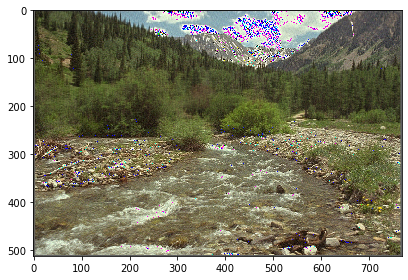

(512, 768, 3)
(512, 768)


In [19]:
#read the image and take its RGB values individually 
image = io.imread('pca_compress_150.png')
io.imshow(image)
io.show()
print(image.shape)
blue,green,red =image[:,:,0],image[:,:,1],image[:,:,2]
print(blue.shape)

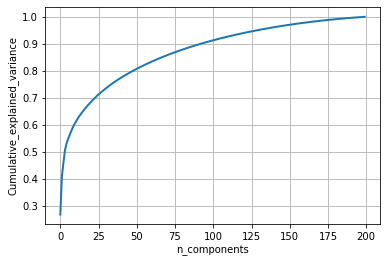

In [20]:
# PCA for dimensionality redcution (non-visualization)

pca = PCA()
pca.n_components = 200
pca_data = pca.fit_transform(blue)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

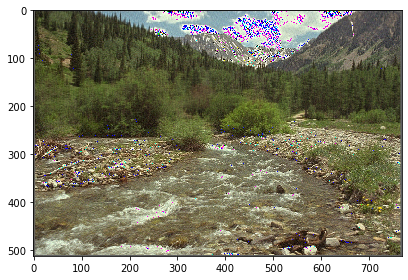

In [18]:
#finding blue ,green and red channel
blue,green,red =image[:,:,0],image[:,:,1],image[:,:,2]

pca = PCA()
pca.n_components = 150
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)
img_compressed2 = (np.dstack((blue_inverted, green_inverted, red_inverted))).astype(np.uint8)

#combine the RGB value to get back the image
img_compressed = (np.dstack((blue_inverted, green_inverted, red_inverted))).astype(np.uint8)

#show the image after compression
io.imshow(img_compressed)
io.show()
#Save the image into memory
io.imsave('pca_compress_150.png', img_compressed)

In [10]:
#shape of both original and compressed image
print(img_compressed.shape)
print(image.shape)
print()

(512, 768, 3)
(512, 768, 3)



In [11]:
print('before compression:',os.path.getsize('kodim23.png'),'Bytes')
print('after compression:',os.path.getsize('pca_compress_150.png'),'Bytes')
print('*' * 50)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'kodim23.png'

In [4]:
image = io.imread('kodim23.png')
newImage = io.imread('pca_compress_150.png')
print ("mse, psnr, ssim and cr value")
print("mse is :",mse(image, newImage))
print("psnr is :",psnr(image, newImage))
print("compression ratio is :",compressRatio(os.path.getsize('kodim23.png'),os.path.getsize('pca_compress_150.png')))

print("ssim is :",ssim(image,newImage))


mse, psnr, ssim and cr value
mse is : 293.73011186387805
psnr is : 23.451318901844672
compression ratio is : 1.1010370674607248
ssim is : 0.9232491071161562


In [12]:
print('after compression:',os.path.getsize('pca_compress_150.png'),'Bytes')

after compression: 677684 Bytes
